<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/01_pytorch_workflow_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. PyTorch workflow

let's explore a an example pytorch end-to-end workflow.

resources:
* book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [70]:
# its like creating a dictionary
what_are_we_covering= {1: "data (prepare and load)",
                       2: "build model",
                       3: "fitting the model to data (training)",
                       4: "making predictions and evaluating a model (interence)",
                       5: "saving and loading a model",
                       6: "putting it all together"}
what_are_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (interence)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [71]:
import torch
from torch import nn #nn contains all of the Pytorch's building blocks for neural network
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
torch.__version__

'2.6.0+cu124'

1. Data (preparing and loading)

Data can bbe almost anything...... in machine learning

* Excel spreadsheet
* Image of any kind
* videos
* audios
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numericl representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, Let's create some known data using the linear regression formula.

We'll use a linear formula to make a straight line with known **parameters**



In [73]:
# create known parameters

weight = 0.7  # weight is b in Y=bX+a
bias = 0.3    # bias is a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y, len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

### Splitting data into training and test sets ( one of the most important concepts in machine learning in general)

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.

Let's create a training and test set with our data.
Validation sets are created often, but not always.

In [74]:
# Create a train/test split
train_split = int(0.8* len(X))
X_train = X[:train_split] # upto the train_split
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!"


In [75]:
# let create a function for that

def plot_predicitions(train_data= X_train,
                      train_labels= y_train,
                      test_data= X_test,
                      test_labels= y_test,
                      predictions=None):
  """
  PLots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot trianing data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

# Are there predictions?
  if predictions is not None:
    # Plot predictions in red (predictions in order)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

 # show the legends
  plt.legend(prop={"size":14})


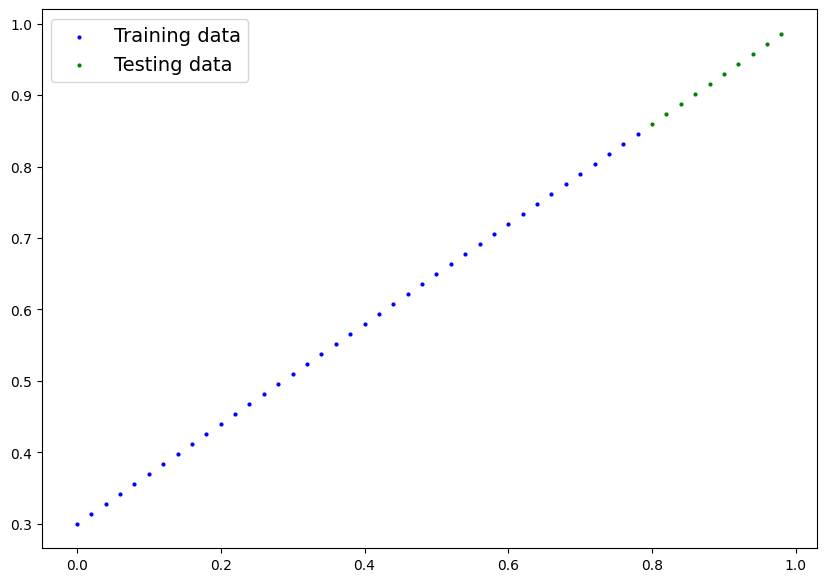

In [76]:
plot_predicitions();

## 2. Buiilding model

Our First Pytorch model

Because we're going to be building classes throughout the course, So getting familiar with OOP in Python: https://realpython.com/python3-object-oriented-programming/

What our model does?
* Start with random values (weight and bais)
* Look at the training data and adjust the random values to better represent the ideal values( the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Back propagation

i.e keep track the gradients of our weights and bias paramters and then it gone a update them in the combination of 1. and 2.

**CLASS IMP**

In [77]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module: https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.rand(1,                   # <- start with random weight and try to adjust it to the ideal weight
                                          requires_grad=True, # <- can this parameter be updated via gradient descent?
                                          dtype=torch.float))
    self.bias= nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))

    # We don't always define the parameter ourselves; instead, we define a layer or import it.

          # For this we can use; linear transform, probing layer, fully connected layer, convolutional layer, etc.

          # nn.Linear(in_features=1, out_features=1) i.e.

          # self.linear_layer = nn.Linear(in_features=1,  # It is number of input
          #                               out_features=1)  # It is output

          # def forward(self, x)
          # return self.linear_layer(x)

          # For different types of layer: https://docs.pytorch.org/docs/stable/nn.html

    # Forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input/training data
    return self.weights * x + self.bias # <- this is the model computation with linear regression formula

### Pytorch model building esentials

* torch.nn - contains all of the buildings for computational graphs (another word for neural networks)
* torch.nn.Parameters - what parameter should our model try and learn, often  Pytorch layer from torch.nn will set these or us.
* torch.nn.MOdule - THe base class for all neural network modules, if we subclass it, we should overwrite forward().
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

Below two are used when we more complicated and complex dataset and also used to load datas:
* torch.utils.data.Datasets - Represents a map between key(labels) and sample(features) pairs of our data. Such as image and their associated labels.
* torch.utils.data.Dataloader- Creates a Python iterable over a torch Dataset (allows you to iterate over your data).
( https://docs.pytorch.org/tutorials/beginner/ptcheat.html)

<img src="/content/sample_data/Screenshot (234).png" alt="PyTorch Workflow" width="800">



torch.manual_seed(42)
torch.rand(1)

### Checking the contents of our Pytorch model

Now we've created a model, let's see what's inside....

So we can check our model parameters or what's inside our model using ' .parameters().

In [78]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# Checking the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [79]:
# List named Parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using **(torch.interference_mode())**

To check our model's predicitive power, let's see how well it predicts 'y_test' basd on 'x_test'

When we pass data through our model, it;s going to  run it through the orward method.

In [80]:
# Make prediction with model

with torch.inference_mode():  # this disables the tracking of data which will consume less memory and prediction data are generally not tracked
  y_preds = model_0(X_test)   # We can use with troch.no_grad() instead of torch.inference_mode()

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

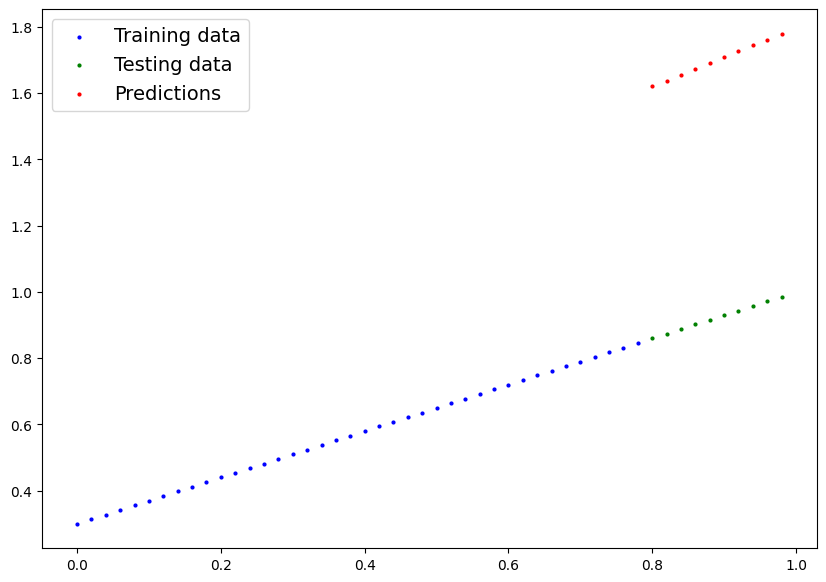

In [81]:
plot_predicitions(predictions=y_preds)  ## look at the previous code as we have deined the parameter predictions with none and now we have given the

## 3. Train model

The whole idea of training is for model move from *unknown* parameters (these may be random) to some *known* parameters.and

Or, From a poor representation of the data to a better representation of the data.

One way to measure how poor or wrong your models predictions are is to use **Loss Function**.  https://docs.pytorch.org/docs/stable/nn.html#loss-functions

* Notes: Loss function may also be called cost function or criterion in different areas.

**Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Very Very Very useul:** https://www.learnpytorch.io/01_pytorch_workflow/

**Optimizer:** Takes into account the loss of a model and adjust the model's parameters (eg: weight and bias) to improve the loss function.
https://docs.pytorch.org/docs/stable/optim.html#optimizer-step

And specifically for PyTorch, we need:
* A training loop
* A testing loop




In [82]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

The **learning rate (lr)** is a fundamental hyperparameter in training neural networks, including our simple linear regression model. It's a positive floating-point value that controls how much the model's parameters (like weight and bias in our case) are adjusted with respect to the gradient of the loss function during each training step.

Think of the training process as trying to find the lowest point in a valley (the point where the loss function is minimized). The optimizer, guided by the gradient (which indicates the steepest direction), takes steps to move towards that lowest point. The learning rate determines the size of these steps.

Here's how different learning rates can affect the training:

Small Learning Rate:
Pros: The optimizer takes small steps, which can lead to a more precise convergence to the minimum of the loss function. It's less likely to overshoot the optimal values.
Cons: Training can be very slow because it takes many small steps to reach the minimum. If the learning rate is too small, the training might get stuck in a local minimum or stop prematurely.
Large Learning Rate:
Pros: The optimizer takes large steps, which can speed up the training process initially. It might also help to escape shallow local minima.
Cons: The optimizer might overshoot the minimum of the loss function, causing the loss to fluctuate wildly or even increase. This can prevent the model from converging or result in a suboptimal solution.
Finding the Right Learning Rate:

Choosing an appropriate learning rate is often an experimental process. It's a balance between training speed and the risk of overshooting or getting stuck. Common strategies include:

Learning Rate Schedules: Starting with a larger learning rate and gradually decreasing it during training.
Learning Rate Range Test: Training the model for a few epochs with a wide range of learning rates and observing how the loss changes to identify a good range.
In our current code, we've set the learning rate to 0.01. This is a common starting point, but you might experiment with different values during the training process to see how it affects the convergence and the final performance of the model.

Does this explanation help clarify the role of the learning rate and the impact of using different values?

In [83]:
# Setup a loss function
loss_fn= torch.nn.L1Loss()        # It is used for mean absolute error or we can write our own formula as torch.mean(torch.abs(y_pred-y_test))

# Setup an optimizer (Stochastic gradient descent, there are others too)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  # lr= learning rate = possibly the most important learning hyperparameter; you can set


Q: Which loss function and optimizer should I use?
A: This is be problem specific. But with experience, we'll get an idea o what works and what doesn't.

For instance, for a regression problem(like now), a loss function of nn.L1Loss() and optimizzer like torch.optim.SDG() will suffice.

But for a classification problem like cassifiying wheather a photo is of a dog or a cat, we'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
* Loop through the data.
* Forward pass (this involves data moving through our model's `forward()` functions) - also called forward propagation
* Calculate the loss (compare forward pass predictions to ground truth labels)
* Optimizer zero grad
* Loss backward - move backward through the network to calculate the gradients of each of the parameters of our model w.r.t the loss (**back propagation**)
* Optimizer step -  use the optimizer to adjust our model's parameters to try and improve the loss ( **gradient(grade/slope) descent**)


In [84]:
with torch.inference_mode():
  list(model_0.parameters())

In [85]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

Epoch: 0 | Train loss: 0.6860889196395874 | Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])

Epoch: 10 | Train loss: 0.5708791017532349 | Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])

Epoch: 20 | Train loss: 0.45566922426223755 | Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])

Epoch: 30 | Train loss: 0.34045934677124023 | Test loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])

Epoch: 40 | Train loss: 0.2252494841814041 | Test loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])

Epoch: 50 | Train loss: 0.1100396141409874 | Test loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])

Epoch: 60 | Train loss: 0.009724985808134079 | Test loss: 0.020998019725084305
OrderedDict([('weights',

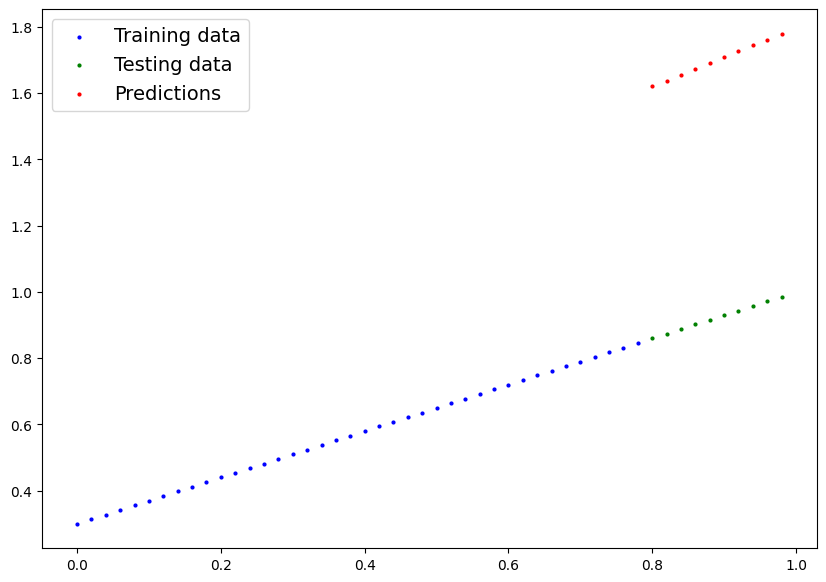

In [86]:
torch.manual_seed(42)

# An epoch is one loop through the data...... ( this is a hyperparameter because we've set it ourself)

epochs=100 # 1 i.e. loop through one time through the data

# Tracking different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# loop through the data

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require gradients

  # 1. Forward passs
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optimizer changes will acculumate through the loop.........we have to zero them above in step 3 for the next iteration of the loop.

  ### Testing
  model_0.eval()    # turns off different settings in the model such as dropout, batch normalization, etc. which are only used during training
  with torch.inference_mode():    # trun off gradient tracking
    # 1. Do the forward pass on the test data
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening
    if epoch % 10 == 0:  # print every 10 epochs not to see too many outputs

      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)

      print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
      # Print out model state_dict()
      print(model_0.state_dict())
      print()

# Print out model state_dict()
print(model_0.state_dict())
print()
plot_predicitions(predictions=y_preds)


In [87]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

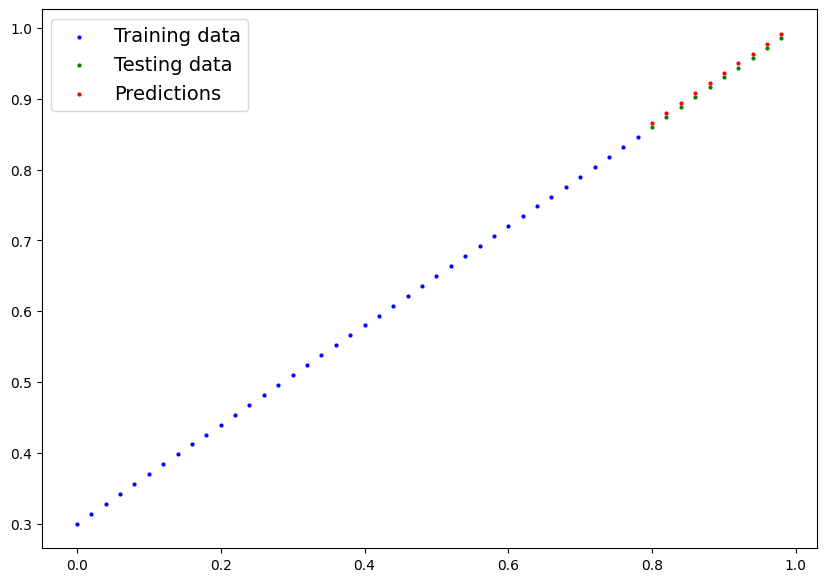

In [88]:
plot_predicitions(predictions=y_preds_new)

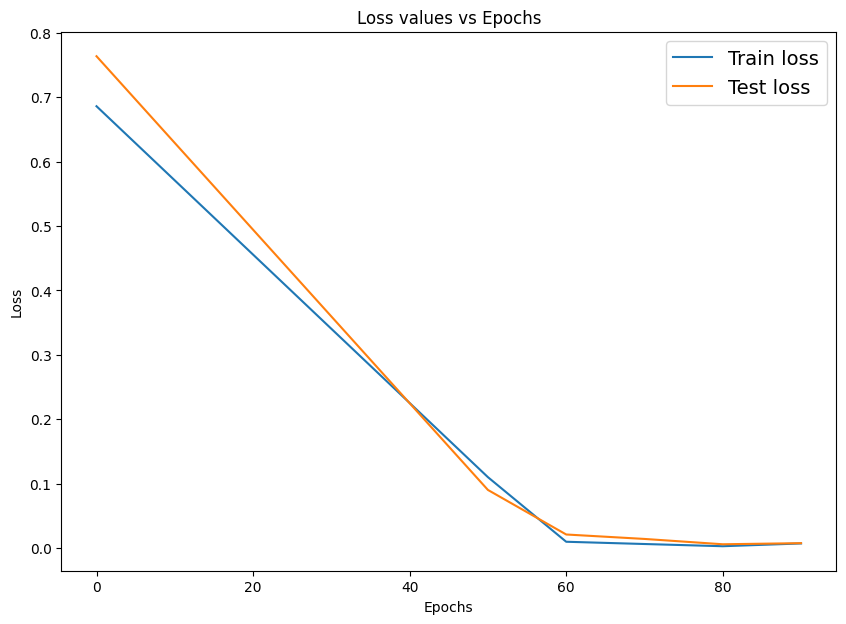

In [89]:
# Plot the loss values
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train loss")    ## convert the loss values to numpy array for plotting
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test loss")
plt.title("Loss values vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(prop={"size": 14})

## 4. Saving and load a model a Pytorch

There are three main methos we should know about saving and loading models in PyTorchFileReader

1. `torch.save()` - allows you save a Pytorch object in Python's pickle format
2. `torch.load()` - allows you load a saved Pytorch object
3. ` torch.nn.Module.load_state_dict()` - This allows to load a model's saved state dictionary

In [90]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create a models directory
Model_path = Path("models")                   # At first this,  Creates a Path object pointing to the folder models
Model_path.mkdir(parents=True, exist_ok=True) # Creates the folder models if it doesn't already exist

# 2. Create model save path
Model_Name= "01_pytorch test saving.pth"  # .pt or .pth for pytorch file this is file name
Model_Save_path = Model_path / Model_Name  # Joins the folder path and file name using / (thanks to pathlib)

# 3. Save the model state dict
print(f"Saving model to: {Model_Save_path}")
torch.save(obj=model_0.state_dict(),        # things to store i.e it stores the parameters only but we can save whole file too
           f=Model_Save_path)              # file path



Saving model to: models/01_pytorch test saving.pth


In [91]:
!ls -1 models # This code is !: Runs a shell command (Linux-style command) from inside Python/Colab.
                #   ls: Lists the files in a directory (like dir in Windows).
                #   -1: Formats the output to one file per line.
                #   models: The name of the folder you're listing.

'01_pytorch test saving.pth'


In [92]:
# Loading a model now
# To load a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()
print(list(loaded_model_0.parameters()))

#Load the sa ved state_dict of model_0 (this will the new instance with updated parameter)
loaded_model_0.load_state_dict(torch.load(f=Model_Save_path))
print(" \nLoaded paramters:\n")
list(loaded_model_0.parameters())

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]
 
Loaded paramters:



[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [93]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
  print(loaded_model_preds)



tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])


In [94]:
# Compare the loaded model preds with orginal model preds
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])